# PART-B  LOGISTIC REGRESSION

* Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.
* Another category of classification is Multinomial classification, which handles the issues where multiple classes are present in the target variable.

In this assignment, we will create 3 Logistic regression models to predict whether or not a customer accepts the Personal Loan and choose the best one.Our target variable is binary-Personal Loan (1= accepts the loan , 0 = does not accept the loan)

## Importing Libraries and Data cleaning

In [489]:
# importing necessary libraries required for the code

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
#from scipy import stats
import seaborn as sns
#from sklearn.datasets import load_boston

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)


In [490]:
import scipy as stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import metrics
from scipy import stats

In [491]:
#importing the dataset
df = pd.read_csv("personalloan.csv")

In [492]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [493]:
#Converting the datatype of CCAvg to float
df["CCAvg"] = df.CCAvg.astype(float)

#### Handling Categorical Columns

* "Education" column in our data is a multi categorical column with values 1= Undergrad, 2=Grad, 3=Post grad
* Inorder to remove the order of preference for the categories, we created dummy variables for the Education column.
* The phenomenon where one or several independent variables predict another is Multi-collinearity. As a result of this the model cannot distinguish between the effects of Dummy variable 1,2 and 3. It won't work properly and this is called Dummy variable trap.
* To avoid this trap we drop one dummy variable column. So for N dummy columns, we have N-1 columns retained. 
* Here we dropped Education_1 and have only Education_2 & Education_3

In [494]:
df= pd.get_dummies(df,columns =['Education'], drop_first=True)

In [530]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,1,0


In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Education_2           5000 non-null uint8
Education_3           5000 non-null uint8
dtypes: float64(1), int64(12), uint8(2)
memory usage: 517.7 KB


In [496]:
#checking if there are any null values
df.isnull().values.any()

False

In [497]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Education_2           0
Education_3           0
dtype: int64

In [596]:
#checking for any correlation
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028,-0.004722,0.021977
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,-0.016264,0.045838
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967,-0.018197,0.020967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,-0.128364,-0.108878
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691,0.037141,-0.034123
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,0.139201,-0.008744
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689,-0.090366,-0.080413
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,-0.031806,-0.014942
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,0.071491,0.090212
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,0.005134,-0.012421


In [597]:
def generateHeatMap(x):
    plt.figure(figsize=(16,12))
    sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
    plt.show()

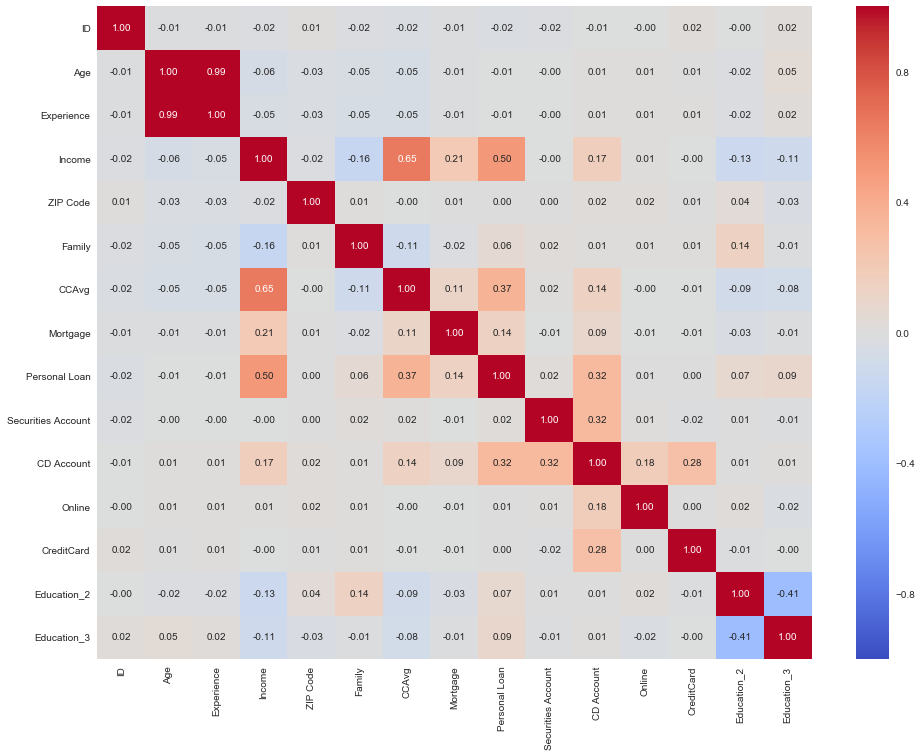

In [598]:
generateHeatMap(df)

* Columns 'ID' don't contribute much to the Personal loan (which is our Y) so we are dropping them
* Age and Experience columns are highly correlated so we are dropping the column 'Experience' 

### Data Analysis Results

* There are no missing values in the data
* We have handled categorical columns in the data, i.e Education column by creating dummy variables.

#### Assumptions:

1. Binary logistic regression requires the dependent variable to be binary. Our target variable Personal Loan is binary.
2. Logistic regression requires the observations to be independent of each other. All the observations are mostly inependent.
3. Logistic regression requires there to be little or no multicollinearity among the independent variables. We've removed Experience column that is collinear with Age column.
4. Logistic regression assumes linearity of independent variables and log odds.
5. Logistic regression typically requires a large sample size. 5000 rows is good enough.

#### Predict Variable (desired target)

Personal Loan column has the list of customers who accepted the loan or not? (binary 1: mean "yes" , 0: means "no")

In [527]:
df['Personal Loan'].value_counts()
#around 90% of our target observations is (0 = Not accepted) and 10% is (1=accepted)

0    4520
1     480
Name: Personal Loan, dtype: int64

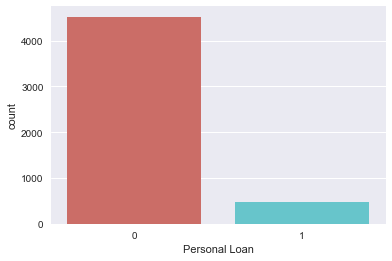

In [529]:
sns.countplot(x='Personal Loan', data=df, palette='hls')
plt.show()

* 90% of our data contains 0 = Loan not accepted and 10% who accepted
* Data is not so balanced

# Logistic Model - 1 

Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [531]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
X=df[['Age','Income','Family','ZIP Code','Mortgage','CCAvg','CD Account','Securities Account','Online','CreditCard','Education_2','Education_3']]
y=df['Personal Loan']     

rfe = RFE(logreg, n_features_to_select=9)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False False  True  True  True  True  True  True  True]
[2 1 1 4 3 1 1 1 1 1 1 1]


* We are using Recursive Feature Elimination approach to select our features, which contribute the most to our target.
* The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute
* Out of the 12 columns we have taken, it selects 9 best features for our model (since we've given it as 9)
* Here RFE has helped us select the following features: 'Income','Family','CCAvg','CD Account','Securities Account','Online','CreditCard','Education_2','Education_3'

In [599]:
#Separating features array and target array
X = df[['Income','Family','CCAvg','CD Account','Securities Account','Online','CreditCard','Education_2','Education_3']]
y = df[['Personal Loan']]

In [600]:
#Implementing the model

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.297389
         Iterations 8
                          Results: Logit
Model:               Logit             No. Iterations:    8.0000   
Dependent Variable:  Personal Loan     Pseudo R-squared:  0.060    
Date:                2019-02-25 19:26  AIC:               2991.8875
No. Observations:    5000              BIC:               3050.5423
Df Model:            8                 Log-Likelihood:    -1486.9  
Df Residuals:        4991              LL-Null:           -1581.0  
Converged:           1.0000            Scale:             1.0000   
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Income              0.0078   0.0011   7.2584 0.0000  0.0057  0.0100
Family             -0.7826   0.0410 -19.0916 0.0000 -0.8629 -0.7023
CCAvg               0.0333   0.0297   1.1

* The p-value is NOT the probability the claim is true.The p-value is NOT the probability the null hypothesis is true
* The p-value is actually the probability of getting a sample like ours, or more extreme than ours IF the null hypothesis is true. So, we assume the null hypothesis is true and then determine how “strange” our sample really is. If it is not that strange (a large p-value) then we don’t change our mind about the null hypothesis. As the p-value gets smaller, we start wondering if the null really is true and well maybe we should change our minds (and reject the null hypothesis).
* The p-values for most of the variables are smaller than 0.05(significant level), except 3 variables CCAvg, Education_2 and Education_3. So we can drop them in our next model and check the performance.

* To understand model performance, dividing the dataset into a training set and a test set is a good strategy.
* Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.
* Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

In [603]:
#Spliting the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Model Development and Prediction
* We already imported the the Logistic Regression module in the start.
* We created a Logistic Regression classifier object using LogisticRegression() function.
* Then, model is fitted on the train set using fit() and we perform predictions on the test set using predict().

In [604]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [605]:
#predicting the test results and caluculating the accuracy
y_pred=logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


#### Model Evaluation using Confusion Matrix

* A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.
* Here, you can see the confusion matrix below in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. 
* You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. 

In [606]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1105,   11],
       [  47,   87]])

#### Visualizing Confusion Matrix using Heatmap
* Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
* Here, you will visualize the confusion matrix using Heatmap

In [607]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

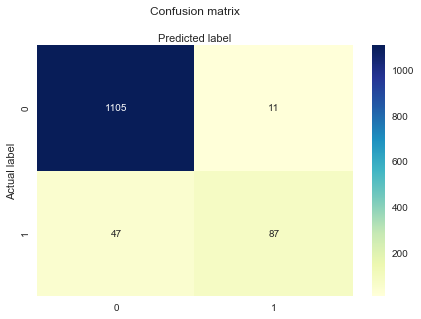

In [608]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [543]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1116
          1       0.89      0.65      0.75       134

avg / total       0.95      0.95      0.95      1250



In [609]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9536
Precision: 0.8877551020408163
Recall: 0.6492537313432836


* We got a classification rate of 95%, considered as very good accuracy.
* Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted customers are going to take a personal loan, that customers have taken 88% of the time.
* Recall: If there are customers who have taken personal loan in the test set and your Logistic Regression model can identify it 64% of the time.

#### ROC Curve

* Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

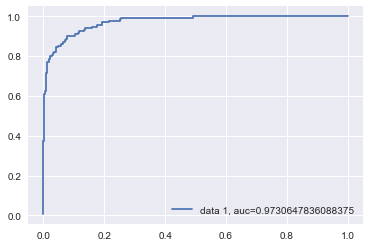

In [610]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

 AUC score here is 0.97 and 1 represents perfect classifier, and 0.5 represents a worthless classifier.

#### Cross Validating the model and checking for the accuracy

In [611]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

5-fold cross validation average accuracy: 0.953


### Answering Questions for Logistic Regression Model 1

#### 1. Is the relationship significant?
Yes, the relationship is significant
#### 2. Are any model assumptions violated?      
No, we have checked our assumptions in data preprocessing
#### 3. Does the model make sense?  Interpret the meaning of each independent variable.  
Yes the model makes complete sense. We used P-values to understand the significance of the models. As a rough rule of thumb, if the absolute value of the Z-value is bigger that 2.0, the variable is significant and P> 0.05 it is not so signifacnt.The p-values for most of the variables are smaller than 0.05(significant level), except 3 variables CCAvg, Education_2 and Education_3. So these are not so significant variables.
#### 4. Cross-validate the model. How well did it do? 
We performed 5 fold cross validation , which did not help to improve our model accuracy much.
#### 5. Calculate the probability of getting the dependent variable
Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted customers are going to take a personal loan, that customers have taken 88% of the time.
* Confusion matrix also help us to find probability



## Logistic Model - 2

* Dropping the 3 columns which has more P values - CCAvg, Education_2 and Education_3 for our second model and repeating the procedure

In [620]:
#Separating features array and target array
X = df[['Income','Family','CD Account','Securities Account','Online','CreditCard']]
y = df[['Personal Loan']]


Writing a function for the whole logistic regression and passing the parameters X and y.

In [621]:
def logistic_regression_model(X,y):
    
    #Implementing the model
    import statsmodels.api as sm
    logit_model=sm.Logit(y,X)
    result=logit_model.fit()
    print(result.summary2())
    
    #Spliting the data into training and test sets
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # instantiate the model (using the default parameters)
    logreg = LogisticRegression()

    # fit the model with data
    logreg.fit(X_train,y_train)
    
    #predicting the test results
    y_pred=logreg.predict(X_test)
    
    # import the metrics class
    print("printing the confusion matrix: ")
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
    print("---------------------------------------")
    #printing the accuracy, precision and recall
    print("printing the accuracy of the model: ")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("printing the Precision of the model: ")
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("printing the recall of the model: ")
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print("---------------------------------------")
    
    #ROC Curve results
    y_pred_proba = logreg.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    print("---------------------------------------")
    print("Accuracy after K fold cross validation: ")
    #Cross validating the model and checking the accuracy
    from sklearn import model_selection
    from sklearn.model_selection import cross_val_score
    kfold = model_selection.KFold(n_splits=5, random_state=7)
    modelCV = LogisticRegression()
    scoring = 'accuracy'
    results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
    print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

Optimization terminated successfully.
         Current function value: 0.297859
         Iterations 8
                          Results: Logit
Model:               Logit             No. Iterations:    8.0000   
Dependent Variable:  Personal Loan     Pseudo R-squared:  0.058    
Date:                2019-02-25 19:46  AIC:               2990.5945
No. Observations:    5000              BIC:               3029.6976
Df Model:            5                 Log-Likelihood:    -1489.3  
Df Residuals:        4994              LL-Null:           -1581.0  
Converged:           1.0000            Scale:             1.0000   
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Income              0.0086   0.0008  11.0880 0.0000  0.0071  0.0101
Family             -0.7533   0.0358 -21.0574 0.0000 -0.8234 -0.6831
CD Account          4.6832   0.2206  21.2

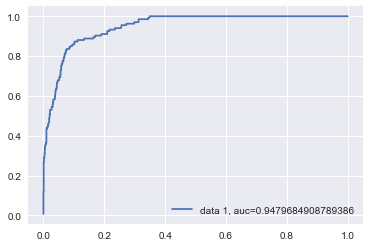

---------------------------------------
Accuracy after K fold cross validation: 
5-fold cross validation average accuracy: 0.933


In [622]:
logistic_regression_model(X,y)

### Answering Questions for Logistic Regression Model 2

#### 1. Is the relationship significant?
Yes, the relationship is significant

#### 2. Are any model assumptions violated?      
No, we have checked our assumptions in data preprocessing

#### 3. Does the model make sense?  Interpret the meaning of each independent variable.  
Yes the model makes complete sense. We used P-values to understand the significance of the models. As a rough rule of thumb, if the absolute value of the Z-value is bigger that 2.0, the variable is significant and P> 0.05 it is not so signifacnt.The p-values for most of the variables are smaller than 0.05(significant level). But the accuracy decrease from the previous model to 92% from 95%

#### 4. Cross-validate the model. How well did it do? 
We performed 5 fold cross validation , which did not help to improve our model accuracy much but increased by little points.

#### 5. Calculate the probability of getting the dependent variable
Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted customers are going to take a personal loan, that customers have taken 78% of the time.


## Logistic Regression - Model 3

* In this model we have used RFE method again to pick up top 5 features which contribute to our model.

In [628]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
X=df[['Age','Income','Family','ZIP Code','Mortgage','CCAvg','CD Account','Securities Account','Online','CreditCard','Education_2','Education_3']]
y=df['Personal Loan']     

rfe = RFE(logreg, n_features_to_select=5)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True  True False  True  True  True]
[6 5 4 8 7 2 1 1 3 1 1 1]


In [629]:
#taken X as all the true values from the above
X=df[['CD Account','Securities Account','CreditCard','Education_2','Education_3']]
y=df['Personal Loan']   

Optimization terminated successfully.
         Current function value: 0.424117
         Iterations 7
                          Results: Logit
Model:               Logit             No. Iterations:    7.0000   
Dependent Variable:  Personal Loan     Pseudo R-squared:  -0.341   
Date:                2019-02-25 22:42  AIC:               4251.1694
No. Observations:    5000              BIC:               4283.7554
Df Model:            4                 Log-Likelihood:    -2120.6  
Df Residuals:        4995              LL-Null:           -1581.0  
Converged:           1.0000            Scale:             1.0000   
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
CD Account          4.0622   0.2040  19.9100 0.0000  3.6623  4.4620
Securities Account -2.4878   0.1971 -12.6234 0.0000 -2.8741 -2.1015
CreditCard         -2.6144   0.1414 -18.4

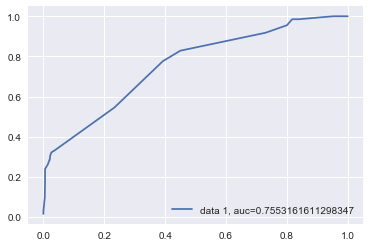

---------------------------------------
Accuracy after K fold cross validation: 
5-fold cross validation average accuracy: 0.917


In [630]:
logistic_regression_model(X,y)

### Answering Questions for Logistic Regression Model 1

#### 1. Is the relationship significant?
Yes, the relationship is significant

#### 2. Are any model assumptions violated?      
No, we have checked our assumptions in data preprocessing

#### 3. Does the model make sense?  Interpret the meaning of each independent variable.  
Yes the model makes complete sense. We used P-values to understand the significance of the models. As a rough rule of thumb, if the absolute value of the Z-value is bigger that 2.0, the variable is significant and P> 0.05 it is not so signifacnt.The p-values for most of the variables are smaller than 0.05(significant level). But the accuracy decreased from previous models to 91%

#### 4. Cross-validate the model. How well did it do? 
We performed 5 fold cross validation , which did not help to improve our model accuracy much.

#### 5. Calculate the probability of getting the dependent variable
Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted customers are going to take a personal loan, that customers have taken 84% of the time.